In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import warnings
warnings.filterwarnings("ignore")

In [7]:
symbol = 'AMZN'
start = '2021-01-01'
end = '2021-12-31'
df = web.DataReader(symbol,"yahoo",start,end)

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,164.145996,162.059998,163.750000,162.846497,59144000,162.846497
2021-01-04,163.600006,157.201004,163.500000,159.331497,88228000,159.331497
2021-01-05,161.169006,158.253006,158.300507,160.925507,53110000,160.925507
2021-01-06,159.875504,156.557999,157.324005,156.919006,87896000,156.919006
2021-01-07,160.427002,157.750000,157.850006,158.108002,70290000,158.108002


In [8]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,168.924720,165.552415,167.272352,167.176168,6.772927e+07,167.176168
std,8.071627,7.898885,7.982573,7.990880,2.323856e+07,7.990880
min,150.449997,144.050003,150.250000,147.597504,3.360600e+07,147.597504
25%,163.600006,160.524994,162.117996,161.699493,5.139400e+07,161.699493
50%,168.610001,165.199997,167.250504,167.044006,6.298400e+07,167.044006
75%,174.166000,170.675507,172.600006,172.406998,7.691800e+07,172.406998
max,188.654007,184.839493,187.199997,186.570496,1.993120e+08,186.570496


In [53]:
# Create Rules, the max is 34.13 and the min is 1.61
high = 180
low = 160

In [54]:
# As default, set everything to 0
df['Signal'] = 0
 
# If stock is more than 170, and we set the signal to -1 which means: 'short'
df.loc[df['Adj Close'] > high, 'Signal'] = -1
 
# If stock is less than 150, and we set the signal to 1 which means: 'long'
df.loc[df['Adj Close'] < low, 'Signal'] = 1
 
buys = df.loc[df['Signal'] == 1]
sells = df.loc[df['Signal'] == -1]

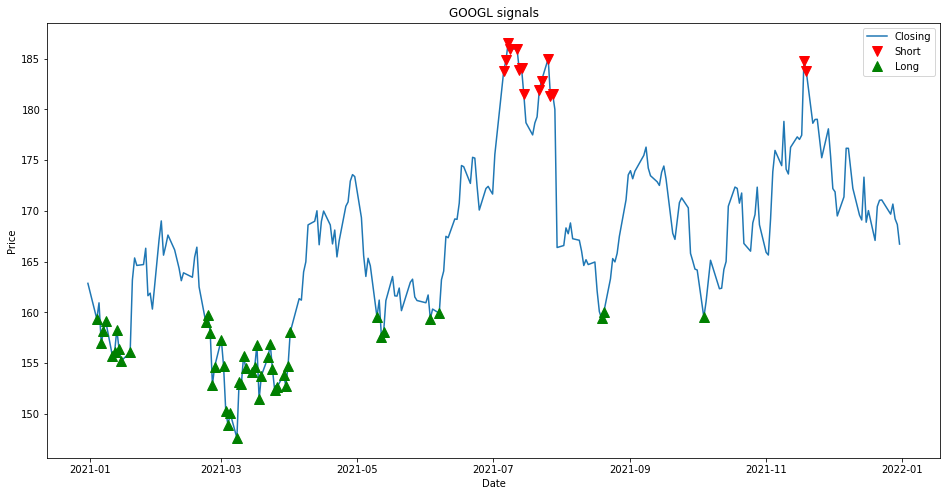

In [55]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['Adj Close'], label='Closing')
plt.plot(sells.index, df.loc[sells.index]['Adj Close'],'v', markersize=10, color='r', label='Short')
plt.plot(buys.index, df.loc[buys.index]['Adj Close'], '^', markersize=10, color='g', label='Long')
plt.title(symbol + ' signals')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()